In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_interference_pdf(num_base_stations, area_size):
    # 무작위로 기지국 위치 생성
    base_stations = np.random.rand(num_base_stations, 2) * area_size

    # 측정 지점 생성
    resolution = 0.1
    x = np.arange(0, area_size[0], resolution)
    y = np.arange(0, area_size[1], resolution)
    xx, yy = np.meshgrid(x, y)
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # 거리에 따른 감쇠 모델링
    interference = np.zeros_like(xx)
    for station in base_stations:
        distances = np.sqrt(np.sum((grid_points - station)**2, axis=1))
        interference += (1 / (distances + 1))  # 거리에 따른 감쇠 모델링

    return xx, yy, interference

def plot_interference(xx, yy, interference):
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, interference, shading='auto', cmap='viridis')
    plt.colorbar(label='Interference Level')
    plt.scatter(base_stations[:, 0], base_stations[:, 1], c='red', marker='x', label='Base Stations')
    plt.title('Interference PDF with Randomly Placed Base Stations')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    np.random.seed(42)  # 재현성을 위한 랜덤 시드 설정
    num_base_stations = 10
    area_size = (100, 100)  # 지역의 크기 (가로, 세로)

    xx, yy, interference = generate_interference_pdf(num_base_stations, area_size)
    plot_interference(xx, yy, interference)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


ValueError: operands could not be broadcast together with shapes (1000,1000) (1000000,) (1000,1000) 

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

random.seed(100)

#기지국 위치 생성, 거리 생성
def BS_location(V, area_size):
    location = []
    distance = np.zeros((V, V))
    
    for i in range(V):
        lx = random.uniform(1, area_size)
        ly = random.uniform(1, area_size)
        location.append([lx, ly])
        
    for i in range(V):
        for j in range(i+1, V):
            D = round(math.sqrt(math.pow(location[i][0] - location[j][0], 2) + math.pow(location[i][1] - location[j][1],2)), 2)
            distance[i][j] = D
            distance[j][i] = D
    return location, distance




    
BS_location(4, 45)


x = BS_location(4, 45)[1]



In [46]:
#전력 생성
random.seed(100)
def power(V, min_ptx, max_ptx):
    P_tx = []
    for i in range(V):
        px = random.randint(min_ptx, max_ptx)
        P_tx.append(px)
    return P_tx
power(4, 40, 50)
t = power(4, 40, 50)


In [47]:
x

array([[ 0.  , 21.04, 38.51, 17.04],
       [21.04,  0.  , 47.51, 13.6 ],
       [38.51, 47.51,  0.  , 33.91],
       [17.04, 13.6 , 33.91,  0.  ]])

In [50]:
a = ((x[0][1] - 1.5)**(-2)) * (t[1])
b = ((x[0][1]+1.5)**(-2)) * (t[1])



0.08857368031121249

In [52]:
import scipy.stats as stats

In [73]:
import numpy as np
from scipy.stats import rayleigh

# 거리와 전송 전력 정보
distances = [1, 2, 3, 4, 5]  # 각 셀과 주변 셀 간의 거리
powers = [10, 20, 30, 40, 50]  # 각 셀의 전송 전력

# PDF 계산
pdfs = []
for i in range(len(distances)):
    for j in range(len(powers)):
        pdf = rayleigh.pdf(x, scale=powers[j])  # Rayleigh 분포의 확률 밀도 함수(PDF) 계산
        pdfs.append(pdf)

# 결과 출력
for i in range(len(pdfs)):
    print(f"PDF {i+1}: {pdfs[i]}")


PDF 1: [[0.00000000e+00 2.30024902e-02 2.31865583e-04 3.98985752e-02]
 [2.30024902e-02 0.00000000e+00 5.96124938e-06 5.39390597e-02]
 [2.31865583e-04 5.96124938e-06 0.00000000e+00 1.07988499e-03]
 [3.98985752e-02 5.39390597e-02 1.07988499e-03 0.00000000e+00]]
PDF 2: [[0.         0.03024601 0.01508097 0.0296334 ]
 [0.03024601 0.         0.00706908 0.02698174]
 [0.01508097 0.00706908 0.         0.02013864]
 [0.0296334  0.02698174 0.02013864 0.        ]]
PDF 3: [[0.         0.01828081 0.01877223 0.01611277]
 [0.01828081 0.         0.01506389 0.01363547]
 [0.01877223 0.01506389 0.         0.01989053]
 [0.01611277 0.01363547 0.01989053 0.        ]]
PDF 4: [[0.         0.01145108 0.01514197 0.00972619]
 [0.01145108 0.         0.01466644 0.00802263]
 [0.01514197 0.01466644 0.         0.01479614]
 [0.00972619 0.00802263 0.01479614 0.        ]]
PDF 5: [[0.         0.00770291 0.01145038 0.00643145]
 [0.00770291 0.         0.01210005 0.00524244]
 [0.01145038 0.01210005 0.         0.01077729]
 [0.

In [76]:
import numpy as np
from scipy.stats import rayleigh

# 거리와 전송 전력 정보
distances = [1, 2, 3, 4, 5]  # 각 셀과 주변 셀 간의 거리
powers = [10, 20, 30, 40, 50]  # 각 셀의 전송 전력

# PDF 계산
pdfs = []
for i in range(len(distances)):
    for j in range(len(powers)):
        pdf = rayleigh.pdf(x, scale=powers[j])  # Rayleigh 분포의 확률 밀도 함수(PDF) 계산
        pdfs.append(pdf)

# 결과 출력
for i in range(len(pdfs)):
    print(f"PDF {i+1}: {pdfs[i]}")


PDF 1: [[0.00000000e+00 2.30024902e-02 2.31865583e-04 3.98985752e-02]
 [2.30024902e-02 0.00000000e+00 5.96124938e-06 5.39390597e-02]
 [2.31865583e-04 5.96124938e-06 0.00000000e+00 1.07988499e-03]
 [3.98985752e-02 5.39390597e-02 1.07988499e-03 0.00000000e+00]]
PDF 2: [[0.         0.03024601 0.01508097 0.0296334 ]
 [0.03024601 0.         0.00706908 0.02698174]
 [0.01508097 0.00706908 0.         0.02013864]
 [0.0296334  0.02698174 0.02013864 0.        ]]
PDF 3: [[0.         0.01828081 0.01877223 0.01611277]
 [0.01828081 0.         0.01506389 0.01363547]
 [0.01877223 0.01506389 0.         0.01989053]
 [0.01611277 0.01363547 0.01989053 0.        ]]
PDF 4: [[0.         0.01145108 0.01514197 0.00972619]
 [0.01145108 0.         0.01466644 0.00802263]
 [0.01514197 0.01466644 0.         0.01479614]
 [0.00972619 0.00802263 0.01479614 0.        ]]
PDF 5: [[0.         0.00770291 0.01145038 0.00643145]
 [0.00770291 0.         0.01210005 0.00524244]
 [0.01145038 0.01210005 0.         0.01077729]
 [0.

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 각 셀의 좌표와 전송 power 정보
cell = [
    {"x": 0, "y": 0, "power": 1.0},
    {"x": 1, "y": 0, "power": 1.0},
    {"x": 0, "y": 1, "power": 1.0},
    {"x": 1, "y": 1, "power": 1.0},
    {"x": 2, "y": 0, "power": 1.0}
]

# 임의의 측정 지점 좌표
measurement_point = {"x": 0.5, "y": 0.5}

# 각 셀과 측정 지점 간의 거리 계산
distances = [np.sqrt((cell["x"] - measurement_point["x"])**2 + (cell["y"] - measurement_point["y"])**2) for cell in cell_info]

# 간섭 power 계산 (간단하게 거리의 역수로 가정)
interference_powers = [cell["power"] / (distance + 1e-9) for distance in distances]

# 각 셀에 대한 간섭의 Probability Density Function (PDF) 계산
pdfs = [norm.pdf(interference_power, loc=0, scale=1) for interference_power in interference_powers]

# 시각화
for i, pdf in enumerate(pdfs):
    plt.plot(np.linspace(0, 2, 100), pdf, label=f'Cell {i + 1}')

plt.title('Interference Probability Density Function (PDF) for Each Cell')
plt.xlabel('Interference Power')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


TypeError: list indices must be integers or slices, not str

/var/folders/6j/lv6vbc0d57lftdbsycv4jdq00000gn/T/ipykernel_20250/2171748856.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.rayleigh(size=1000), hist=False)
/Users/phiminji/opt/anaconda3/envs/postmac/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/phiminji/opt/anaconda3/envs/postmac/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future versio

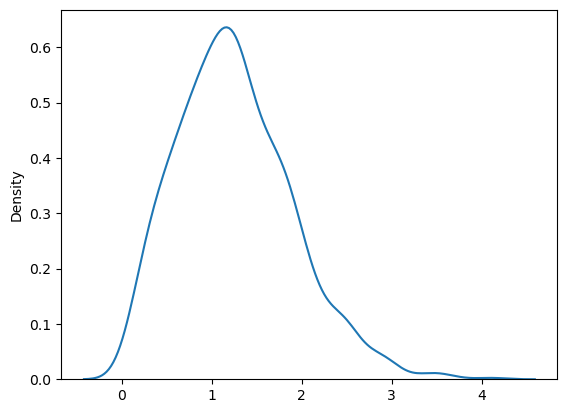

In [81]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.rayleigh(size=1000), hist=False)

plt.show()

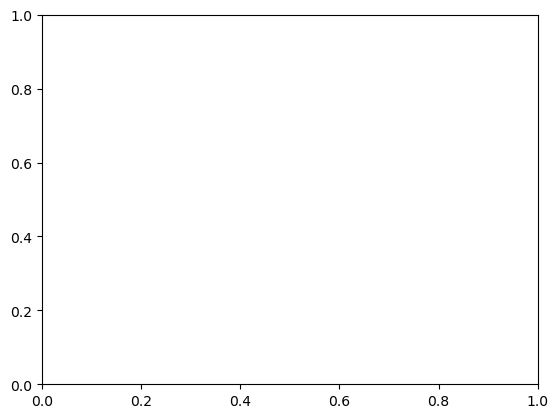

In [82]:
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [83]:
a = 1.99
mean, var, skew, kurt = gamma.stats(a, moments='mvsk')


In [84]:
x = np.linspace(gamma.ppf(0.01, a),
                gamma.ppf(0.99, a), 100)
ax.plot(x, gamma.pdf(x, a),
       'r-', lw=5, alpha=0.6, label='gamma pdf')

In [85]:
rv = gamma(a)

In [87]:
vals = gamma.ppf([0.001, 0.5, 0.999], a)
np.allclose([0.001, 0.5, 0.999], gamma.cdf(vals, a))

True

In [88]:
r = gamma.rvs(a, size=1000)

In [92]:
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

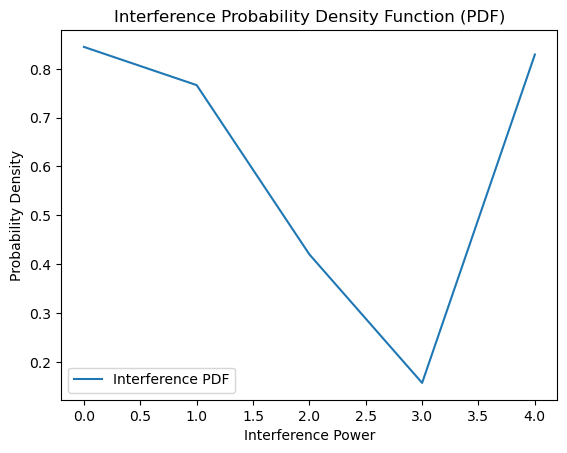

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def generate_interference_pdf(distances, transmit_powers):
    """
    거리와 전송 전력을 사용하여 간섭 전력의 확률밀도함수 (PDF)를 생성하는 함수

    Parameters:
    - distances: 주변 셀과의 거리 리스트
    - transmit_powers: 주변 셀의 전송 전력 리스트

    Returns:
    - pdf: 생성된 간섭 전력의 확률밀도함수
    """
    # 간섭 전력 계산
    interference_powers = [transmit_power / (distance + 1e-9) for distance, transmit_power in zip(distances, transmit_powers)]

    # 평균과 표준편차 계산
    mean_interference = np.mean(interference_powers)
    std_interference = np.std(interference_powers)

    # 확률밀도함수 (PDF) 생성
    pdf = norm.pdf(interference_powers, loc=mean_interference, scale=std_interference)

    return pdf

# 예시: 각 셀의 거리와 전송 전력
cell_distances = [1.0, 1.5, 2.0, 0.8, 1.2]  # 거리 (임의의 값)
transmit_powers = [1.0, 1.2, 0.9, 1.5, 1.1]  # 전송 전력 (임의의 값)

# 간섭 전력의 확률밀도함수 (PDF) 생성
interference_pdf = generate_interference_pdf(cell_distances, transmit_powers)

# 시각화
plt.plot(interference_pdf, label='Interference PDF')
plt.title('Interference Probability Density Function (PDF)')
plt.xlabel('Interference Power')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


Sample 1: [1.   0.8  0.45]
Sample 2: [1.   0.8  0.45]
Sample 3: [1.   0.8  0.45]
Sample 4: [1.   0.8  0.45]
Sample 5: [1.   0.8  0.45]


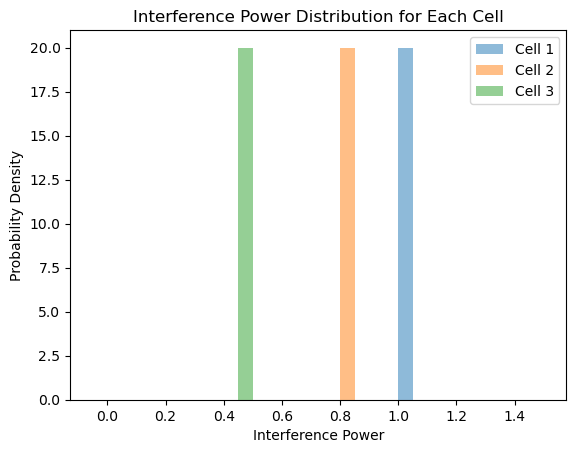

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def generate_interference_powers(num_samples, distances, transmit_powers):
    """
    거리와 전송 전력을 사용하여 간섭 전력을 생성하는 함수

    Parameters:
    - num_samples: 각 cell에서 생성할 간섭 전력 샘플 수
    - distances: 주변 셀과의 거리 리스트
    - transmit_powers: 주변 셀의 전송 전력 리스트

    Returns:
    - interference_powers: 생성된 간섭 전력 배열 (shape: (num_samples, num_cells))
    """
    num_cells = len(distances)

    interference_powers = np.zeros((num_samples, num_cells))

    for i in range(num_samples):
        for j in range(num_cells):
            # 간섭 전력 계산 (간단한 모델)
            interference_powers[i, j] = transmit_powers[j] / (distances[j] + 1e-9)

    return interference_powers

# 예시: 각 셀의 거리와 전송 전력
cell_distances = np.array([1.0, 1.5, 2.0])  # 거리 (임의의 값)
transmit_powers = np.array([1.0, 1.2, 0.9])  # 전송 전력 (임의의 값)

# 간섭 전력 생성 (5개씩)
num_samples = 5
interference_powers = generate_interference_powers(num_samples, cell_distances, transmit_powers)

# 결과 출력
for i in range(num_samples):
    print(f'Sample {i + 1}: {interference_powers[i, :]}')

# 시각화
for j in range(len(cell_distances)):
    plt.hist(interference_powers[:, j], bins=20, density=True, alpha=0.5, label=f'Cell {j + 1}')

plt.title('Interference Power Distribution for Each Cell')
plt.xlabel('Interference Power')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


Sample 1: [1.   0.8  0.45]
Sample 2: [1.   0.8  0.45]
Sample 3: [1.   0.8  0.45]
Sample 4: [1.   0.8  0.45]
Sample 5: [1.   0.8  0.45]


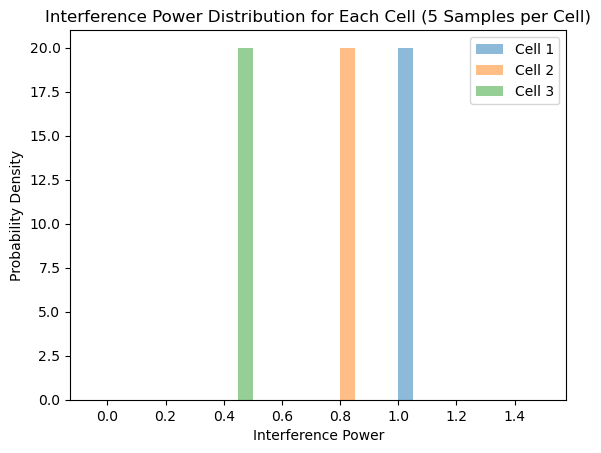

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def generate_interference_powers(num_samples_per_cell, distances, transmit_powers):
    """
    거리와 전송 전력을 사용하여 간섭 전력을 생성하는 함수

    Parameters:
    - num_samples_per_cell: 각 주변 셀에서 생성할 간섭 전력 샘플 수
    - distances: 주변 셀과의 거리 리스트
    - transmit_powers: 주변 셀의 전송 전력 리스트

    Returns:
    - interference_powers: 생성된 간섭 전력 배열 (shape: (num_samples_per_cell, num_cells))
    """
    num_cells = len(distances)

    interference_powers = np.zeros((num_samples_per_cell, num_cells))

    for i in range(num_samples_per_cell):
        for j in range(num_cells):
            # 간섭 전력 계산 (간단한 모델)
            interference_powers[i, j] = transmit_powers[j] / (distances[j] + 1e-9)

    return interference_powers

# 예시: 각 셀의 거리와 전송 전력
cell_distances = np.array([1.0, 1.5, 2.0])  # 거리 (임의의 값)
transmit_powers = np.array([1.0, 1.2, 0.9])  # 전송 전력 (임의의 값)

# 한 개의 주변 cell당 5개의 random한 간섭 전력 생성
num_samples_per_cell = 5
interference_powers = generate_interference_powers(num_samples_per_cell, cell_distances, transmit_powers)

# 결과 출력
for i in range(num_samples_per_cell):
    print(f'Sample {i + 1}: {interference_powers[i, :]}')

# 시각화
for j in range(len(cell_distances)):
    plt.hist(interference_powers[:, j], bins=20, density=True, alpha=0.5, label=f'Cell {j + 1}')

plt.title('Interference Power Distribution for Each Cell (5 Samples per Cell)')
plt.xlabel('Interference Power')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


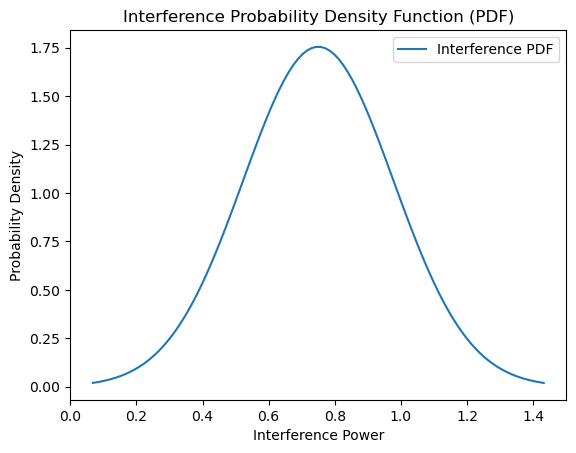

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def generate_interference_pdf(distances, transmit_powers):
    """
    거리와 전송 전력을 사용하여 간섭 전력의 확률밀도함수 (PDF)를 생성하는 함수

    Parameters:
    - distances: 주변 셀과의 거리 리스트
    - transmit_powers: 주변 셀의 전송 전력 리스트

    Returns:
    - pdf: 생성된 간섭 전력의 확률밀도함수
    """
    num_cells = len(distances)

    # 각 셀에서의 간섭 전력 계산
    interference_powers = [transmit_power / (distance + 1e-9) for distance, transmit_power in zip(distances, transmit_powers)]

    # 평균과 표준편차 계산
    mean_interference = np.mean(interference_powers)
    std_interference = np.std(interference_powers)

    # 확률밀도함수 (PDF) 생성
    pdf_x = np.linspace(mean_interference - 3 * std_interference, mean_interference + 3 * std_interference, 100)
    pdf_y = norm.pdf(pdf_x, loc=mean_interference, scale=std_interference)

    return pdf_x, pdf_y

# 예시: 각 셀의 거리와 전송 전력
cell_distances = np.array([1.0, 1.5, 2.0])  # 거리 (임의의 값)
transmit_powers = np.array([1.0, 1.2, 0.9])  # 전송 전력 (임의의 값)

# 간섭 전력의 확률밀도함수 (PDF) 생성
pdf_x, pdf_y = generate_interference_pdf(cell_distances, transmit_powers)

# 시각화
plt.plot(pdf_x, pdf_y, label='Interference PDF')
plt.title('Interference Probability Density Function (PDF)')
plt.xlabel('Interference Power')
plt.ylabel('Probability Density')
plt.legend()
plt.show()



0.9336247284846874 0.3033362964343007
0.9336247284846874 0.3033362964343007
0.9336247284846874 0.3033362964343007
0.9336247284846874 0.3033362964343007
1.340943948388083 0.5611497235193684
1.340943948388083 0.5611497235193684
1.340943948388083 0.5611497235193684
1.340943948388083 0.5611497235193684
1.144343222647747 0.2982363542659459
1.144343222647747 0.2982363542659459
1.144343222647747 0.2982363542659459
1.144343222647747 0.2982363542659459
0.9560411942685523 0.18226128261783925
0.9560411942685523 0.18226128261783925
0.9560411942685523 0.18226128261783925
0.9560411942685523 0.18226128261783925
1.0733248287648773 0.32830670311899784
1.0733248287648773 0.32830670311899784
1.0733248287648773 0.32830670311899784
1.0733248287648773 0.32830670311899784


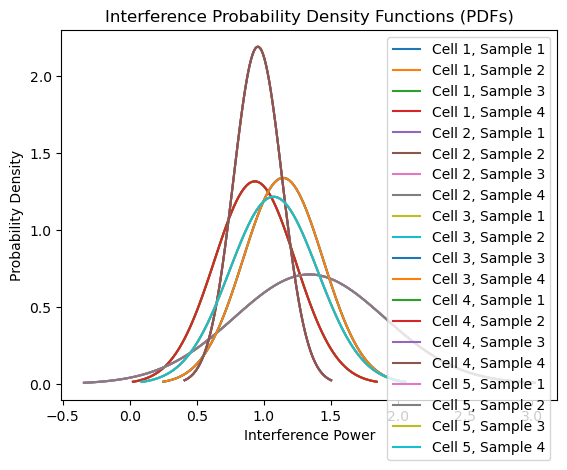

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def generate_interference_pdf(num_cells, num_samples_per_cell, distances_matrix, transmit_powers_matrix):
    """
    거리와 전송 전력을 사용하여 간섭 전력의 확률밀도함수 (PDF)를 생성하는 함수

    Parameters:
    - num_cells: cell의 수
    - num_samples_per_cell: 각 cell당 생성할 간섭 전력 샘플 수
    - distances_matrix: 거리 행렬 (shape: (num_cells, num_cells))
    - transmit_powers_matrix: 전송 전력 행렬 (shape: (num_cells, num_cells))

    Returns:
    - pdfs: 생성된 간섭 전력의 확률밀도함수 리스트 (길이: num_cells * num_samples_per_cell)
    """
    pdfs = []

    for i in range(num_cells):
        for _ in range(num_samples_per_cell):
            # 주변 cell의 거리와 전송 전력 가져오기
            distances = distances_matrix[i, :]
            transmit_powers = transmit_powers_matrix[i, :]

            # 간섭 전력 계산
            interference_powers = [transmit_power / (distance + 1e-9) for distance, transmit_power in zip(distances, transmit_powers)]

            # 평균과 표준편차 계산
            mean_interference = np.mean(interference_powers)
            std_interference = np.std(interference_powers)
            print(mean_interference, std_interference)

            # 확률밀도함수 (PDF) 생성
            pdf_x = np.linspace(mean_interference - 3 * std_interference, mean_interference + 3 * std_interference, 100)
            pdf_y = norm.pdf(pdf_x, loc=mean_interference, scale=std_interference)

            pdfs.append((pdf_x, pdf_y))

    return pdfs

# 예시: 5개의 cell에 대한 거리와 전송 전력 행렬
num_cells = 5
num_samples_per_cell = 4

distances_matrix = np.random.uniform(0.5, 2.0, size=(num_cells, num_cells))  # 임의의 거리 행렬 생성
np.fill_diagonal(distances_matrix, 1.0)  # 대각 원소는 1.0으로 설정
transmit_powers_matrix = np.random.uniform(0.8, 1.5, size=(num_cells, num_cells))  # 임의의 전송 전력 행렬 생성
np.fill_diagonal(transmit_powers_matrix, 1.0)  # 대각 원소는 1.0으로 설정

# 간섭 전력의 확률밀도함수 (PDF) 생성
pdfs = generate_interference_pdf(num_cells, num_samples_per_cell, distances_matrix, transmit_powers_matrix)

# 시각화
for i, (pdf_x, pdf_y) in enumerate(pdfs):
    plt.plot(pdf_x, pdf_y, label=f'Cell {i // num_samples_per_cell + 1}, Sample {i % num_samples_per_cell + 1}')

plt.title('Interference Probability Density Functions (PDFs)')
plt.xlabel('Interference Power')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


/Users/phiminji/opt/anaconda3/envs/postmac/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:1983: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


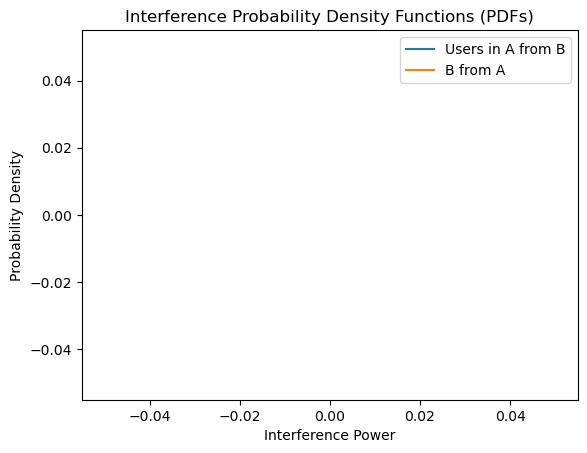

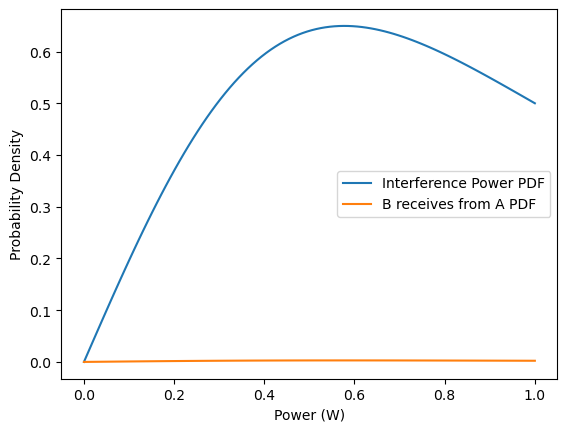

In [99]:
import numpy as np
import matplotlib.pyplot as plt

# A 셀과 B 셀의 전송 전력
Pa = 45
Pb = 45

# A 셀과 B 셀 사이의 거리
d = 10

# 간섭 전력 계산
I = Pb / (d ** 4)

# 간섭 전력의 확률 밀도 함수
x = np.linspace(0, 1, 100)
y = 2 * x / (1 + x**2)**2

# B가 A로부터 얻는 간섭 전력의 확률 밀도 함수
z = y * I

# 그래프 그리기
plt.plot(x, y, label='Interference Power PDF')
plt.plot(x, z, label='B receives from A PDF')
plt.xlabel('Power (W)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


In [104]:
print(x)

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

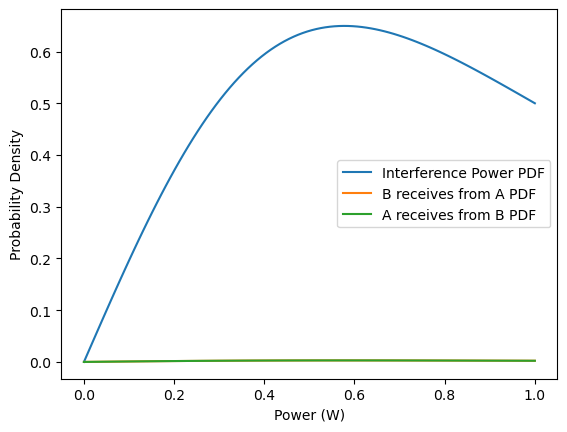

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# A 셀과 B 셀의 전송 전력
Pa = 45
Pb = 45

# A 셀과 B 셀 사이의 거리
d = 10

# 간섭 전력 계산
I = Pb / (d ** 4)

# 간섭 전력의 확률 밀도 함수
x = np.linspace(0, 1, 100)
y = 2 * x / (1 + x**2)**2

# B가 A로부터 얻는 간섭 전력의 확률 밀도 함수
z = y * I

# A가 B로부터 얻는 간섭 전력의 확률 밀도 함수
w = y * Pa / (d ** 4)

# 그래프 그리기
plt.plot(x, y, label='Interference Power PDF')
plt.plot(x, z, label='B receives from A PDF')
plt.plot(x, w, label='A receives from B PDF')
plt.xlabel('Power (W)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


In [2]:
conda install torch tqdm

Retrieving notices: ...working... done
Channels:
 - defaults
Platform: osx-64
Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - torch

Current channels:

  - defaults

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install torch tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 3.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 3.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.0 MB 3.3 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 3.6 MB/s eta 0:00:00a 0:00:01


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import random

In [5]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


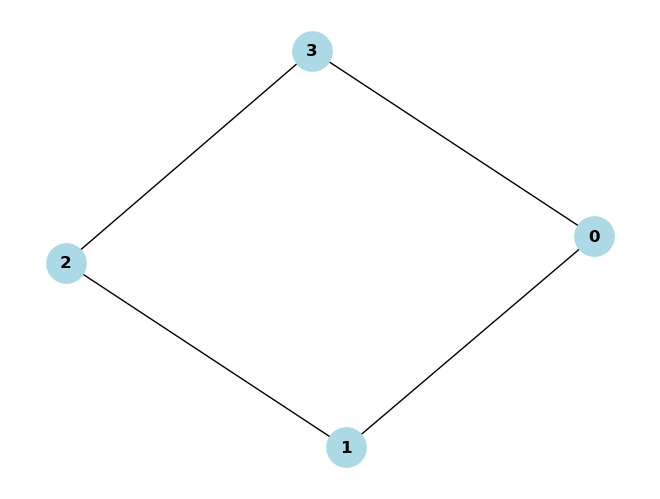

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import torch
import numpy

# 주어진 인접 행렬
adjacency_matrix = torch.tensor([[0, 1, 0, 1],
                                [1, 0, 1, 0],
                                [0, 1, 0, 1],
                                [1, 0, 1, 0]])

# networkx 그래프 생성
G = nx.from_numpy_array(adjacency_matrix.numpy())

# 그래프 시각화
pos = nx.spring_layout(G)  # 레이아웃 정의
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='lightblue', node_size=800)
plt.show()


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import random

adjacency_matrix = torch.tensor([[0, 1, 0, 1],
                                 [1, 0, 1, 0],
                                 [0, 1, 0, 1],
                                 [1, 0, 1, 0]])  #인접행렬
num_nodes = len(adjacency_matrix) #각 node 개수
num_colors = [3, 2, 1, 2] #각 노드에 필요한 색의 수

In [19]:
#Q-network 정의
def create_q_network(input_size, output_size):
    return nn.Sequential(
        nn.Linear(input_size, 64),
        nn.ReLU(),
        nn.Linear(64, output_size))

In [21]:
#경험 버퍼 정의 함수
def create_replay_buffer(capacity): #경험 버퍼 생성, capacity = 저장할 수 있는 경험버퍼의 수
    
    buffer = []

    def add_experience(experience): #경험을 버퍼에 추가, 나중에 재활용
        if len(buffer) >= capacity:
            buffer.pop(0)
        buffer.append(experience)

    def sample_batch(batch_size): #랜덤하게 샘플링된 배치를 가져옴, 과거 경험을 가져옴
        return random.sample(buffer,  batch_size)

    return add_experience, sample_batch

In [69]:
#에피소드 실행 함수
def run_episode(q_network, add_experience, epsilon):
    state = torch.zeros(num_nodes, dtype = torch.float32)
    total_reward = 0

    while state.sum() < sum(num_colors):
        action = epsilon_greedy_action(q_network, state, epsilon)
        reward = color_node(state, action)
        total_reward += reward
        next_state = state.clone()
        add_experience((state, action, reward, next_state))
        state = next_state
    return total_reward

In [90]:
#에피소드에서 노드 할당 함수
def color_node(state, action):
    state[action] += 1 #해당 노드에 색상 할당
    reward = 0

    #모든 노드에 색상이 할당되면 보상 추가
    if state.sum() == num_nodes * max(num_colors):
        reward += 10

    print(state)

    #연결된 노드끼리는 색을 겹치게 할당하지 않도록 보상 추가
    for i in range(num_nodes):
        for j in range(num_nodes):
            if adjacency_matrix[i][j] == 1 and state[i] == state[j]:
                reward -= 1

    return reward
    

In [91]:
#입실론-greedy 정책에 따라 액션 선택
#ε-그리디 정책을 기반으로 Q-네트워크에서 상태(state)에 대해 액션을 선택하는 역할
def epsilon_greedy_action(q_network, state, epsilon):
    if random.random() < epsilon: #0부터 1사이의 랜덤 값을 생성하여 이 값이 입실론보다 작으면 무작위로 액션 선택
        return random.randint(0, len(state)-1) #무작위로 선택된 액션은 상태의 길이 범위 내에서 랜덤하게 선택
    else:
        q_values = q_network(state) #Q-network를 사용해서 최적의 액션 선택
        return torch.argmax(q_values).item() #Q-값중에서 가장 큰 값을 가지는 액션의 인덱스를 얻어 반환

In [92]:
#학습 함수
def train(q_network, target_network, optimizer, sample_batch, batch_size, gamma):
    if len(sample_batch(batch_size)) < batch_size:
        return
    batch = sample_batch(batch_size)
    states, actions, rewards, next_states = zip(*batch)

    states = torch.stack(states)
    actions = torch.tensor(actions, dtype = torch.long)
    rewards = torch.tensor(rewards, dtype = torch.float32)
    next_states = torch.stack(next_states)

    q_values = q_network(states).gather(1, actions.unsqueeze(1))
    target_q_values = rewards + gamma * torch.max(target_network(next_states), dim = 1).values.unsqueeze(1)

    loss = nn.MSELoss()(q_values, target_q_values.detach())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [93]:
def main():
    input_size = num_nodes
    output_size = num_nodes

    q_network = create_q_network(input_size, output_size)
    target_network = create_q_network(input_size, output_size)
    target_network.load_state_dict(q_network.state_dict())
    optimizer = optim.Adam(q_network.parameters(), lr = 0.001) #학습률 0.001
    add_experience, sample_batch = create_replay_buffer(capacity = 1000)
    epsilon = 1.0
    gamma = 0.1
    batch_size = 32
    num_episodes = 1000

    for episode in range(1, num_episodes+1):
        total_reward = run_episode(q_network, add_experience, epsilon)
        epsilon *= 0.995

        if episode % 10 == 0:
            train(q_network, target_network, optimizer, sample_batch, batch_size, gamma)
            target_network.load_state_dict(q_network.state_dict())

        print(f"Episode : {episode}, Total Reward : {total_reward}")

if __name__ == "__main__":
    main()
            
    

tensor([1., 0., 0., 0.])
tensor([1., 0., 1., 0.])
tensor([2., 0., 1., 0.])
tensor([2., 0., 2., 0.])
tensor([2., 0., 2., 1.])
tensor([2., 0., 3., 1.])
tensor([3., 0., 3., 1.])
tensor([4., 0., 3., 1.])
Episode : 1, Total Reward : -4
tensor([0., 0., 0., 1.])
tensor([0., 0., 1., 1.])
tensor([0., 0., 2., 1.])
tensor([0., 0., 2., 2.])
tensor([1., 0., 2., 2.])
tensor([1., 0., 2., 3.])
tensor([1., 0., 2., 4.])
tensor([1., 0., 3., 4.])
Episode : 2, Total Reward : -16
tensor([0., 0., 0., 1.])
tensor([0., 1., 0., 1.])
tensor([0., 1., 1., 1.])
tensor([0., 1., 1., 2.])
tensor([0., 1., 2., 2.])
tensor([0., 1., 3., 2.])
tensor([0., 2., 3., 2.])
tensor([0., 2., 4., 2.])
Episode : 3, Total Reward : -12
tensor([0., 0., 1., 0.])
tensor([0., 0., 2., 0.])
tensor([0., 0., 3., 0.])
tensor([0., 0., 3., 1.])
tensor([0., 0., 4., 1.])
tensor([0., 1., 4., 1.])
tensor([1., 1., 4., 1.])
tensor([2., 1., 4., 1.])
Episode : 4, Total Reward : -20
tensor([0., 1., 0., 0.])
tensor([1., 1., 0., 0.])
tensor([2., 1., 0., 0.]

In [96]:
import math

def calculate_interference_power(distance, transmit_power, noise_power):
    # Path loss model (you may need to adjust the parameters based on your scenario)
    path_loss_exponent = 2.0  # Path loss exponent
    reference_distance = 1.0  # Reference distance in meters
    path_loss = (distance / reference_distance) ** (-path_loss_exponent)
    
    # Received signal power
    received_signal_power = transmit_power - 20 * math.log10(distance / reference_distance) - path_loss
    
    # Interference power
    interference_power = 10 ** (received_signal_power / 10) + noise_power

    print(path_loss, received_signal_power, interference_power)
    
    return interference_power

# Example usage
cell_distance = 500  # Distance between cells in meters
transmit_power_cell1 = 30  # Transmit power of cell 1 in dBm
transmit_power_cell2 = 28  # Transmit power of cell 2 in dBm
noise_power = -90  # Noise power in dBm

# Calculate interference power for cell 1
interference_power_cell1 = calculate_interference_power(cell_distance, transmit_power_cell2, noise_power)
print(f"Interference power for cell 1: {interference_power_cell1:.2f} dBm")

# Calculate interference power for cell 2
interference_power_cell2 = calculate_interference_power(cell_distance, transmit_power_cell1, noise_power)
print(f"Interference power for cell 2: {interference_power_cell2:.2f} dBm")


4e-06 -25.979404086720375 -89.9974761729466
Interference power for cell 1: -90.00 dBm
4e-06 -23.979404086720375 -89.99600000368413
Interference power for cell 2: -90.00 dBm
